<a href="https://colab.research.google.com/github/Shemonti/Brain-tumor-detection-/blob/main/tumor_cls_Depthwise_Separable_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import fnmatch
import os
import PIL
import glob
import tensorflow as tf
from matplotlib.image import  imread
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!unzip /content/drive/MyDrive/tumor.zip

Archive:  /content/drive/MyDrive/tumor.zip
   creating: tumor/glioma_tumor/
 extracting: tumor/glioma_tumor/1841.jpg  
 extracting: tumor/glioma_tumor/1842.jpg  
 extracting: tumor/glioma_tumor/1843.jpg  
 extracting: tumor/glioma_tumor/1844.jpg  
 extracting: tumor/glioma_tumor/1845.jpg  
 extracting: tumor/glioma_tumor/1846.jpg  
 extracting: tumor/glioma_tumor/1847.jpg  
 extracting: tumor/glioma_tumor/1848.jpg  
  inflating: tumor/glioma_tumor/1849.jpg  
 extracting: tumor/glioma_tumor/1850.jpg  
 extracting: tumor/glioma_tumor/1851.jpg  
 extracting: tumor/glioma_tumor/1852.jpg  
 extracting: tumor/glioma_tumor/1853.jpg  
 extracting: tumor/glioma_tumor/1854.jpg  
 extracting: tumor/glioma_tumor/1855.jpg  
 extracting: tumor/glioma_tumor/1856.jpg  
 extracting: tumor/glioma_tumor/1857.jpg  
 extracting: tumor/glioma_tumor/1858.jpg  
 extracting: tumor/glioma_tumor/1859.jpg  
 extracting: tumor/glioma_tumor/1860.jpg  
 extracting: tumor/glioma_tumor/1861.jpg  
 extracting: tumor/gl

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/tumor')
data_dir

PosixPath('/content/tumor')

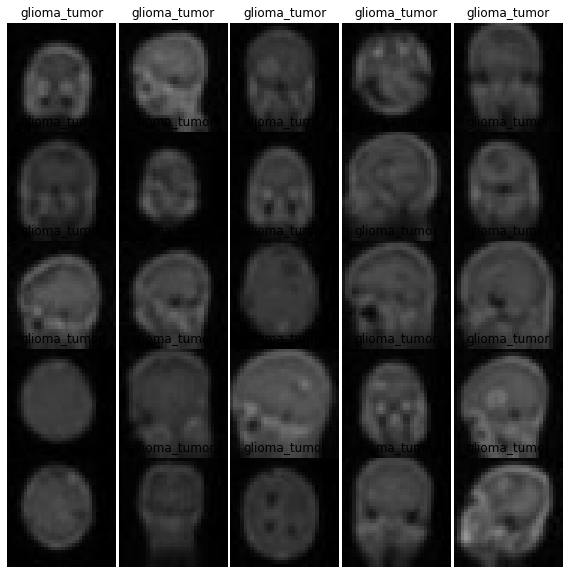

In [ ]:
glimoa=list(data_dir.glob('glioma_tumor/*'))
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for imgname in glimoa[:25]:
    im = cv2.imread(str(imgname))

    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.axis('off')
    plt.title('glioma_tumor')
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB));
     #.set_title(l)

    i_ += 1

In [ ]:
glimoa[:5]

[PosixPath('/content/tumor/glioma_tumor/2292.jpg'),
 PosixPath('/content/tumor/glioma_tumor/2853.jpg'),
 PosixPath('/content/tumor/glioma_tumor/2653.jpg'),
 PosixPath('/content/tumor/glioma_tumor/1978.jpg'),
 PosixPath('/content/tumor/glioma_tumor/2533.jpg')]

In [ ]:
len(glimoa)

1426

In [ ]:
meningioma=list(data_dir.glob('meningioma_tumor/*'))


In [ ]:
meningioma[:5]

[PosixPath('/content/tumor/meningioma_tumor/173.jpg'),
 PosixPath('/content/tumor/meningioma_tumor/279.jpg'),
 PosixPath('/content/tumor/meningioma_tumor/446.jpg'),
 PosixPath('/content/tumor/meningioma_tumor/333.jpg'),
 PosixPath('/content/tumor/meningioma_tumor/689.jpg')]

In [ ]:
len(meningioma)

708

In [ ]:
pituitary=list(data_dir.glob('pituitary_tumor/*'))

In [ ]:
pituitary[:5]

[PosixPath('/content/tumor/pituitary_tumor/1095.jpg'),
 PosixPath('/content/tumor/pituitary_tumor/709.jpg'),
 PosixPath('/content/tumor/pituitary_tumor/1562.jpg'),
 PosixPath('/content/tumor/pituitary_tumor/1099.jpg'),
 PosixPath('/content/tumor/pituitary_tumor/1207.jpg')]

In [ ]:
len(pituitary)

930

In [ ]:
tumor_images_dict = {
    'glimoa':list(data_dir.glob('glioma_tumor/*')),
    'meningioma':list(data_dir.glob('meningioma_tumor/*')),
    'pituitary':list(data_dir.glob('pituitary_tumor/*')),

}

In [ ]:
tumor_labels_dict = {
    'glimoa': 0,
    'meningioma': 1,
    'pituitary': 2,

}

In [ ]:
X, y = [], []

for tumor_name, images in tumor_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        im = cv2.resize(img, (64, 64))
        X.append(im)
        y.append(tumor_labels_dict[tumor_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
len(X_train)

2298

In [ ]:
len(X_test)

766

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
data_augmentation = keras.Sequential(
  [
   layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(32,
                                                              32,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',  patience=2)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def block(layer,filters,kernel_size,strides=1,padding='valid',layer_name='conv',
          pool_size=2,pool_strides=None,filter_2=False):

  if layer_name == 'conv':
    layer = tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,
                                   strides=strides,use_bias=False)(layer)
    layer = tf.keras.layers.BatchNormalization()(layer)
    layer = tf.keras.layers.ReLU()(layer)
    layer = tf.keras.layers.Conv2D(filters=filters*2,kernel_size=kernel_size,
                                  use_bias=False)(layer)
    layer = tf.keras.layers.BatchNormalization()(layer)
    layer = tf.keras.layers.ReLU()(layer)

  elif layer_name == 'separable_conv':
    layer = tf.keras.layers.SeparableConv2D(filters, kernel_size,
                                            padding=padding, use_bias=False)(layer)
    layer = tf.keras.layers.BatchNormalization()(layer)
    layer = tf.keras.layers.ReLU()(layer)
    if filter_2:
      layer = tf.keras.layers.SeparableConv2D(filter_2, kernel_size,
                                              padding=padding, use_bias=False)(layer)
    else:
      layer = tf.keras.layers.SeparableConv2D(filters, kernel_size,
                                              padding=padding, use_bias=False)(layer)
    layer = tf.keras.layers.BatchNormalization()(layer)
    layer = tf.keras.layers.MaxPooling2D(pool_size, strides=pool_strides,
                                         padding=padding)(layer)
  return layerf

def add_block(layer,filters,kernel_size,strides=1,padding='valid',pool_size=2,pool_strides=None):
  layer = tf.keras.layers.ReLU()(layer)
  layer = tf.keras.layers.SeparableConv2D(filters,kernel_size,padding=padding,use_bias=False)(layer)
  layer = tf.keras.layers.BatchNormalization()(layer)
  layer = tf.keras.layers.ReLU()(layer)
  layer = tf.keras.layers.SeparableConv2D(filters,kernel_size,padding=padding,use_bias=False)(layer)
  layer = tf.keras.layers.BatchNormalization()(layer)
  layer = tf.keras.layers.MaxPooling2D(pool_size, strides=pool_strides,
                                         padding=padding)(layer)
  return layer

In [ ]:

def entry_flow(input_layer):
  block_1 = block(input_layer,32,3,2,layer_name='conv')

  block_2 = block(block_1,128,3,padding='same',layer_name='separable_conv')
  layer_add = tf.keras.layers.Conv2D(filters=128,kernel_size=1,strides=2,
                                 padding='same',use_bias=False)(block_1)
  layer_add = tf.keras.layers.BatchNormalization()(layer_add)
  layer = tf.keras.layers.Add()([block_2,layer_add])

  block_3 = add_block(layer,256,3,1,'same',3,2)
  layer_add = tf.keras.layers.Conv2D(filters=256,kernel_size=1,strides=2,
                                 padding='same',use_bias=False)(layer)
  layer_add = tf.keras.layers.BatchNormalization()(layer_add)
  layer = tf.keras.layers.Add()([block_3,layer_add])

  block_4 = add_block(layer,728,3,1,'same',3,2)
  layer_add = tf.keras.layers.Conv2D(filters=728,kernel_size=1,strides=2,
                                 padding='same',use_bias=False)(layer)
  layer_add = tf.keras.layers.BatchNormalization()(layer_add)
  layer = tf.keras.layers.Add()([block_4,layer_add])
  return layer

In [ ]:
def middle_flow(input_layer):
    for _ in range(8):
      for __ in range(3):
        layer = tf.keras.layers.ReLU()(input_layer)
        layer = tf.keras.layers.SeparableConv2D(filters=728, kernel_size=3,
                                                padding='same',use_bias=False)(layer)

      layer=  tf.keras.layers.DepthwiseConv2D(
    (3,3),
    strides=(1, 1),
    padding='valid',
    depth_multiplier=1,
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    depthwise_initializer='glorot_uniform',
    bias_initializer='zeros',
    depthwise_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    depthwise_constraint=None,
    bias_constraint=None,

)(layer)
      layer = tf.keras.layers.GlobalMaxPool2D()(layer)
      layer = tf.keras.layers.BatchNormalization()(layer)
      output_layer = tf.keras.layers.Add()([input_layer, layer])
    return output_layer

In [ ]:
def exit_flow(input_layer):
  layer = tf.keras.layers.ReLU()(input_layer)
  block_1 = block(layer,728,3,padding='same',layer_name='separable_conv',
                  pool_size=3,pool_strides=2,filter_2=1024)

  layer_add = tf.keras.layers.Conv2D(filters=1024, kernel_size=1,
                                 strides=2, padding='same', use_bias=False)(input_layer)

  layer_add = tf.keras.layers.BatchNormalization()(layer_add)
  layer = tf.keras.layers.Add()([block_1, layer_add])

  layer = tf.keras.layers.SeparableConv2D(filters=1536, kernel_size=3,
                                          padding='same',use_bias=False)(layer)
  # layer = tf.keras.layers.BatchNormalization()(layer)
  # layer = tf.keras.layers.ReLU()(layer)
  # layer = tf.keras.layers.SeparableConv2D(filters=2048, kernel_size=3,
  #                                         padding='same',use_bias=False)(layer)
  # layer = tf.keras.layers.BatchNormalization()(layer)
  # layer = tf.keras.layers.ReLU()(layer)
  # layer = tf.keras.layers.SeparableConv2D(filters=1536, kernel_size=3,
  #                                         padding='same',use_bias=False)(layer)
  # layer = tf.keras.layers.BatchNormalization()(layer)
  # layer = tf.keras.layers.ReLU()(layer)
  # layer = tf.keras.layers.SeparableConv2D(filters=1024, kernel_size=3,
  #                                         padding='same',use_bias=False)(layer)
  layer = tf.keras.layers.BatchNormalization()(layer)
  layer = tf.keras.layers.ReLU()(layer)
  layer = tf.keras.layers.GlobalAvgPool2D()(layer)
  layer = tf.keras.layers.Dense(1000, activation='relu')(layer)

  return layer

In [ ]:
def xception(shape,include_top):
  model_input = tf.keras.layers.Input(shape=shape)
  entry_block = entry_flow(model_input)
  mid_block = middle_flow(entry_block)
  exit_block = exit_flow(mid_block)

  if include_top:
    model_output = tf.keras.layers.Dense(3)(exit_block)
    model = tf.keras.models.Model(model_input, model_output)
  model = tf.keras.models.Model(model_input, model_output)
  model.summary()
  return model

shape =  64,64,3
model = xception(shape,include_top=True)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_64 (Conv2D)             (None, 31, 31, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_228 (Batch  (None, 31, 31, 32)  128         ['conv2d_64[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu_339 (ReLU)               (None, 31, 31, 32)   0           ['batch_normalization_228[0

In [ ]:
starter_learning_rate = 1e-2
end_learning_rate = 1e-5
decay_steps = 80000
learning_rate_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    starter_learning_rate,
    decay_steps,
    end_learning_rate,
    power=0.8)

model.compile(loss=tf.losses.SparseCategoricalCrossentropy
              (from_logits=True),
              optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate_fn),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])


callbacks = [
    tf.keras.callbacks.ModelCheckpoint('xception_model.h5',
                                       save_best_only=True,
                                       save_weights_only=True,
                                       monitor='loss')]

# model.fit(train_dataset,
#           epochs=epochs,steps_per_epoch=len(train_images)//batch_size,
#           callbacks=callbacks)
history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test), epochs=50,callbacks=callbacks)

Epoch 1/50
72/72 [==============================] - 106s 1s/step - loss: 0.1925 - sparse_categorical_accuracy: 0.9347 - val_loss: 1.1130 - val_sparse_categorical_accuracy: 0.2911
Epoch 2/50
72/72 [==============================] - 103s 1s/step - loss: 0.1465 - sparse_categorical_accuracy: 0.9456 - val_loss: 1.2539 - val_sparse_categorical_accuracy: 0.2911
Epoch 3/50
72/72 [==============================] - 103s 1s/step - loss: 0.1001 - sparse_categorical_accuracy: 0.9656 - val_loss: 1.3076 - val_sparse_categorical_accuracy: 0.4687
Epoch 4/50
72/72 [==============================] - 103s 1s/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9791 - val_loss: 1.6241 - val_sparse_categorical_accuracy: 0.4060
Epoch 5/50
72/72 [==============================] - 103s 1s/step - loss: 0.0618 - sparse_categorical_accuracy: 0.9813 - val_loss: 1.5965 - val_sparse_categorical_accuracy: 0.6501
Epoch 6/50
72/72 [==============================] - 102s 1s/step - loss: 0.0255 - sparse_categorical_accu

In [ ]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 5s 225ms/step - loss: 0.2257 - sparse_categorical_accuracy: 0.9399


[0.2257089614868164, 0.939947783946991]

In [ ]:
model.history

In [ ]:
model_loss = pd.DataFrame(history.history)
model_loss

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.192500,0.934726,1.112975,0.291123
1,0.146515,0.945605,1.253926,0.291123
2,0.100120,0.965622,1.307599,0.468668
3,0.069948,0.979112,1.624135,0.406005
4,0.061845,0.981288,1.596461,0.650131
5,0.025524,0.994343,1.335972,0.767624
6,0.013600,0.998695,0.683041,0.805483
7,0.010003,0.998259,0.449871,0.861619
8,0.008173,0.998695,0.268190,0.912533
9,0.007042,0.998695,0.325668,0.894256


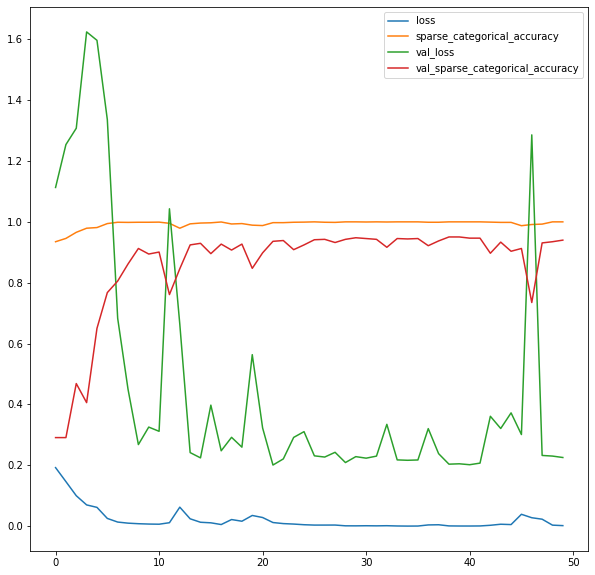

In [ ]:
model_loss.plot()#epoch=5